First of all, let's install Dask

In [ ]:
%!pip install dask

In [1]:
import dask.dataframe as dd
df = dd.read_csv('NF-UQ-NIDS-v2.csv')

In [3]:
df.head()

,IPV4_SRC_ADDR,L4_SRC_PORT,IPV4_DST_ADDR,L4_DST_PORT,PROTOCOL,L7_PROTO,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,...,TCP_WIN_MAX_OUT,ICMP_TYPE,ICMP_IPV4_TYPE,DNS_QUERY_ID,DNS_QUERY_TYPE,DNS_TTL_ANSWER,FTP_COMMAND_RET_CODE,Label,Attack,Dataset
0,192.168.100.148,65389,192.168.100.7,80,6,7.0,420,3,0,0,...,0,35840,140,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
1,192.168.100.148,11154,192.168.100.5,80,6,7.0,280,2,40,1,...,0,0,0,0,0,0,0.0,1,DoS,NF-BoT-IoT-v2
2,192.168.1.31,42062,192.168.1.79,1041,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
3,192.168.1.34,46849,192.168.1.79,9110,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2
4,192.168.1.30,50360,192.168.1.152,1084,6,0.0,44,1,40,1,...,0,0,0,0,0,0,0.0,0,Benign,NF-ToN-IoT-v2


In [4]:
df.columns

Index(['IPV4_SRC_ADDR', 'L4_SRC_PORT', 'IPV4_DST_ADDR', 'L4_DST_PORT',
       'PROTOCOL', 'L7_PROTO', 'IN_BYTES', 'IN_PKTS', 'OUT_BYTES', 'OUT_PKTS',
       'TCP_FLAGS', 'CLIENT_TCP_FLAGS', 'SERVER_TCP_FLAGS',
       'FLOW_DURATION_MILLISECONDS', 'DURATION_IN', 'DURATION_OUT', 'MIN_TTL',
       'MAX_TTL', 'LONGEST_FLOW_PKT', 'SHORTEST_FLOW_PKT', 'MIN_IP_PKT_LEN',
       'MAX_IP_PKT_LEN', 'SRC_TO_DST_SECOND_BYTES', 'DST_TO_SRC_SECOND_BYTES',
       'RETRANSMITTED_IN_BYTES', 'RETRANSMITTED_IN_PKTS',
       'RETRANSMITTED_OUT_BYTES', 'RETRANSMITTED_OUT_PKTS',
       'SRC_TO_DST_AVG_THROUGHPUT', 'DST_TO_SRC_AVG_THROUGHPUT',
       'NUM_PKTS_UP_TO_128_BYTES', 'NUM_PKTS_128_TO_256_BYTES',
       'NUM_PKTS_256_TO_512_BYTES', 'NUM_PKTS_512_TO_1024_BYTES',
       'NUM_PKTS_1024_TO_1514_BYTES', 'TCP_WIN_MAX_IN', 'TCP_WIN_MAX_OUT',
       'ICMP_TYPE', 'ICMP_IPV4_TYPE', 'DNS_QUERY_ID', 'DNS_QUERY_TYPE',
       'DNS_TTL_ANSWER', 'FTP_COMMAND_RET_CODE', 'Label', 'Attack', 'Dataset'],
      dtype='ob

In [5]:
df.count().compute()

IPV4_SRC_ADDR                  75987976
L4_SRC_PORT                    75987976
IPV4_DST_ADDR                  75987976
L4_DST_PORT                    75987976
PROTOCOL                       75987976
L7_PROTO                       75987976
IN_BYTES                       75987976
IN_PKTS                        75987976
OUT_BYTES                      75987976
OUT_PKTS                       75987976
TCP_FLAGS                      75987976
CLIENT_TCP_FLAGS               75987976
SERVER_TCP_FLAGS               75987976
FLOW_DURATION_MILLISECONDS     75987976
DURATION_IN                    75987976
DURATION_OUT                   75987976
MIN_TTL                        75987976
MAX_TTL                        75987976
LONGEST_FLOW_PKT               75987976
SHORTEST_FLOW_PKT              75987976
MIN_IP_PKT_LEN                 75987976
MAX_IP_PKT_LEN                 75987976
SRC_TO_DST_SECOND_BYTES        75987976
DST_TO_SRC_SECOND_BYTES        75987976
RETRANSMITTED_IN_BYTES         75987976


In [26]:
# Проверим, нет ли пропусков
df.isnull().sum().compute()

IPV4_SRC_ADDR                  0
L4_SRC_PORT                    0
IPV4_DST_ADDR                  0
L4_DST_PORT                    0
PROTOCOL                       0
L7_PROTO                       0
IN_BYTES                       0
IN_PKTS                        0
OUT_BYTES                      0
OUT_PKTS                       0
TCP_FLAGS                      0
CLIENT_TCP_FLAGS               0
SERVER_TCP_FLAGS               0
FLOW_DURATION_MILLISECONDS     0
DURATION_IN                    0
DURATION_OUT                   0
MIN_TTL                        0
MAX_TTL                        0
LONGEST_FLOW_PKT               0
SHORTEST_FLOW_PKT              0
MIN_IP_PKT_LEN                 0
MAX_IP_PKT_LEN                 0
SRC_TO_DST_SECOND_BYTES        0
DST_TO_SRC_SECOND_BYTES        0
RETRANSMITTED_IN_BYTES         0
RETRANSMITTED_IN_PKTS          0
RETRANSMITTED_OUT_BYTES        0
RETRANSMITTED_OUT_PKTS         0
SRC_TO_DST_AVG_THROUGHPUT      0
DST_TO_SRC_AVG_THROUGHPUT      0
NUM_PKTS_U

In [38]:
df_attack_info = df['Attack'].value_counts().compute()

In [39]:
df_attack_info

Benign            25165295
DDoS              21748351
DoS               17875585
scanning           3781419
Reconnaissance     2633778
xss                2455020
password           1153323
injection           684897
Bot                 143097
Brute Force         123982
Infilteration       116361
Exploits             31551
Fuzzers              22310
Backdoor             18978
Generic              16560
mitm                  7723
ransomware            3425
Theft                 2431
Analysis              2299
Shellcode             1427
Worms                  164
Name: Attack, dtype: int64

In [40]:
import pandas as pd
def get_others(df_info):
    others = pd.Series(data=[0], index=['Others'])
    for key in df_info.keys():
        if df_info[key]/sum(df_info) < 0.01:
            others['Others'] += df_info[key]
            df_info = df_info.drop(labels=[key])
    df_info = pd.concat([df_info, others])
    return df_info

In [41]:
df_attack_info = get_others(df_attack_info)
df_attack_info

Benign            25165295
DDoS              21748351
DoS               17875585
scanning           3781419
Reconnaissance     2633778
xss                2455020
password           1153323
Others             1175205
dtype: int64

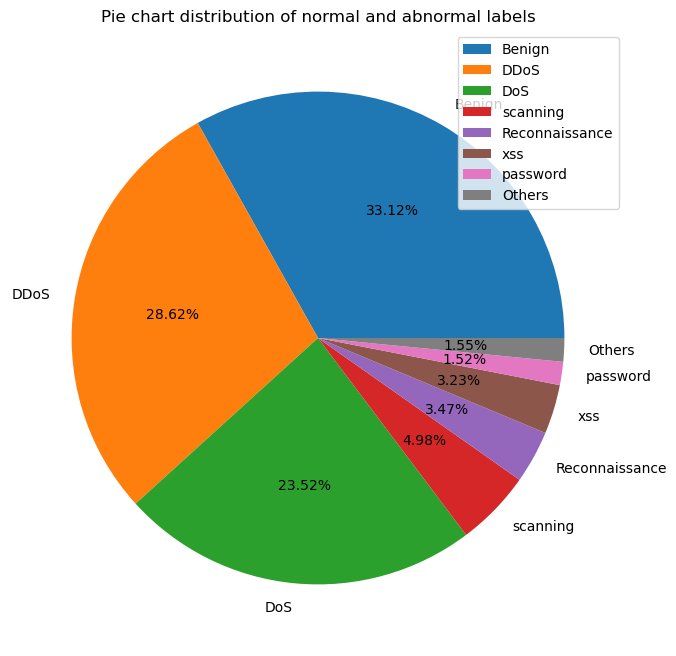

In [42]:
import matplotlib.pyplot as plt

# pie chart distribution of normal and abnormal labels
plt.figure(figsize=(8,8))
plt.pie(df_attack_info,labels=df_attack_info.index,autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [45]:
df_benign_proto_info = df[df['Attack']=='Benign']['PROTOCOL'].value_counts().compute()

In [46]:
df_benign_proto_info

6      16308947
17      8811834
1         37763
2          4022
58         2079
89          547
132          78
47           24
44            1
Name: PROTOCOL, dtype: int64

In [47]:
df_benign_proto_info.index = ['TCP','UDP','ICMP','IGMP','IPv6-ICMP','OSPF','SCTP','GRE', 'IPv6-Frag']

In [48]:
df_benign_proto_info

TCP          16308947
UDP           8811834
ICMP            37763
IGMP             4022
IPv6-ICMP        2079
OSPF              547
SCTP               78
GRE                24
IPv6-Frag           1
Name: PROTOCOL, dtype: int64

In [49]:
df_benign_proto_info = get_others(df_benign_proto_info)
df_benign_proto_info

TCP       16308947
UDP        8811834
Others       44514
dtype: int64

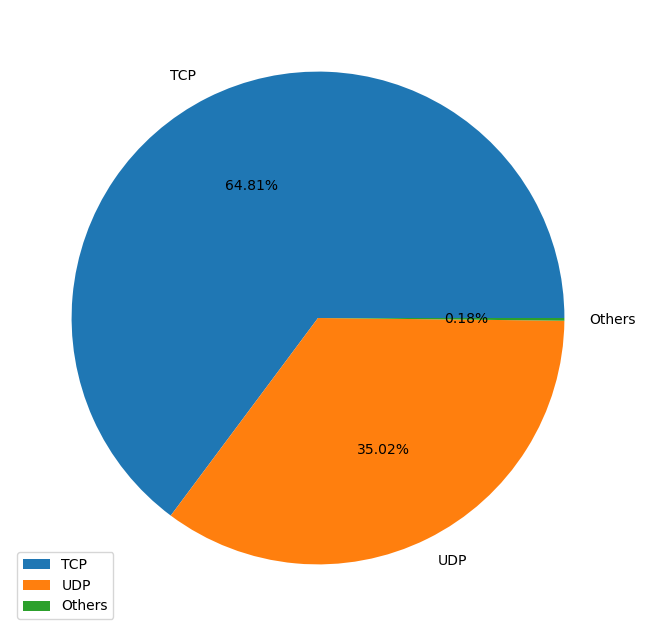

In [57]:
plt.figure(figsize=(8,8))
plt.pie(df_benign_proto_info,labels=df_benign_proto_info.index,autopct='%0.2f%%')
#plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()

In [51]:
df_attack_proto_info = df[df['Attack']!='Benign']['PROTOCOL'].value_counts().compute()

In [53]:
df_attack_proto_info.head()

6     30409362
17    20396506
1         4099
89         811
2          203
Name: PROTOCOL, dtype: int64

In [54]:
df_attack_proto_info = get_others(df_attack_proto_info)
df_attack_proto_info

6         30409362
17        20396506
Others       16813
dtype: int64

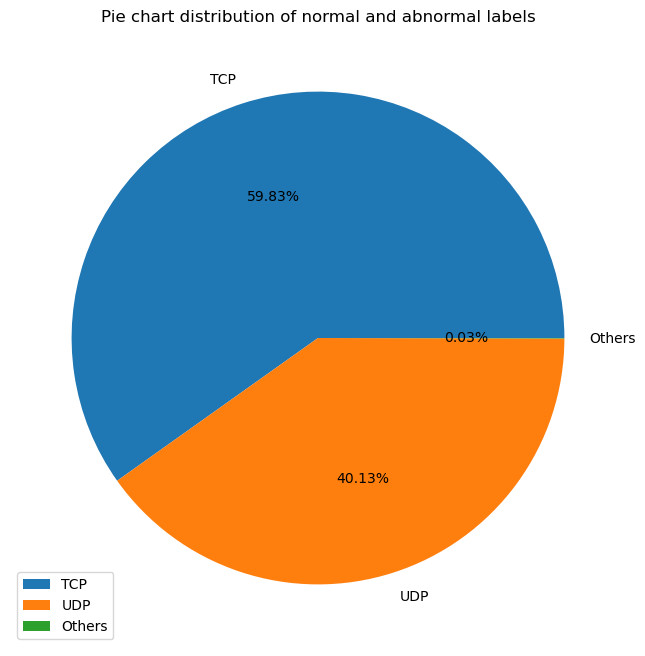

In [56]:
df_attack_proto_info.index = ['TCP', 'UDP', 'Others']
plt.figure(figsize=(8,8))
plt.pie(df_attack_proto_info,labels=df_attack_proto_info.index,autopct='%0.2f%%')
plt.title("Pie chart distribution of normal and abnormal labels")
plt.legend()
plt.show()